In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
cus_demo=pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name='CustomerDemographic')
cus_demo

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0


In [3]:
cus_demo.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [4]:
cus_demo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

there are total 13 number of fields where null values exists

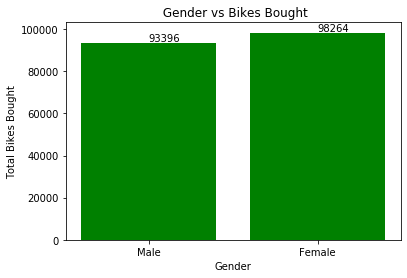

In [5]:
## Gender vs Bikes_bought
G=list(cus_demo['gender'])
y=list(cus_demo['past_3_years_bike_related_purchases'])
lst = []
sum=0
for i in range(0,4000):
    if G[i]=='Male':
        sum =sum + y[i]
lst.append(sum)
sum=0
for i in range(0,4000):
    if G[i]=='Female':
        sum =sum + y[i]
lst.append(sum)
Gender=['Male','Female']

plt.bar(Gender,lst,color='g')
plt.xlabel('Gender')
plt.ylabel('Total Bikes Bought')
plt.title(' Gender vs Bikes Bought')

for i in range(2):
    plt.text(x=i,y=lst[i]+900,s = lst[i],size=10)

plt.show()

The difference between the bikes bought between males and females is low.

In [6]:
cus_demo['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [7]:
df =cus_demo.dropna(how='any',subset=['job_industry_category'])
df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
5,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,3995,Rusty,Iapico,Male,93,1975-12-12,Staff Scientist,Manufacturing,Mass Customer,N,á,Yes,14.0
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN


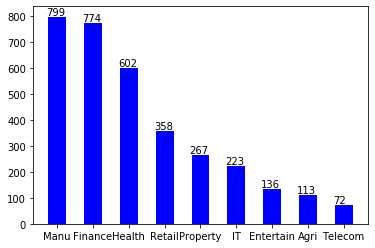

In [8]:
val=[799,774,602,358,267,223,136,113,72]
x3=np.arange(9)
plt.bar(x3,val,width=0.5,color='blue')
for i in range(len(val)):
    plt.text(x=i-0.30,y=val[i]+7,s = val[i], size = 10)

    plt.xticks(x3,("Manu", "Finance", "Health", "Retail", "Property", "IT", "Entertain", "Agri", "Telecom"))

Maximum number of custormers are from manufacturing industry and minimum are from Telecom

In [9]:
cus_demo['wealth_segment'].value_counts()

Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64

([<matplotlib.axis.XTick at 0x2ba95486088>,
 <a list of 3 Text xticklabel objects>)

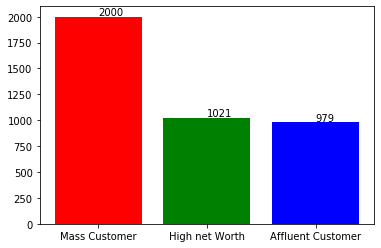

In [10]:
val=[2000,1021,979]
col=['r','g','b']

x=np.arange(3)
plt.bar(x,val,color=col)

for i in range(3):
    plt.text(x=i,y=val[i]+15,s=val[i])
    
plt.xticks(x,['Mass Customer','High net Worth','Affluent Customer'])


In [11]:
cus_demo['owns_car'].value_counts()

Yes    2024
No     1976
Name: owns_car, dtype: int64

([<matplotlib.axis.XTick at 0x2ba9523c1c8>,
 <a list of 2 Text xticklabel objects>)

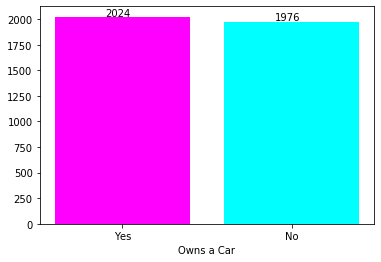

In [12]:
val = [2024 , 1976]
col=['magenta','cyan']
x=np.arange(2)
plt.bar(x,val,color=col)
plt.xlabel('Owns a Car')
for i in range(2):
    plt.text(x=i-0.1,y=val[i]+10,s=val[i])
    

plt.xticks(x,['Yes','No'])

In [13]:
new_cus=pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name='NewCustomerList')
new_cus


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.70,0.8750,1.09375,0.929688,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.11250,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.68,0.6800,0.68000,0.680000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.52,0.6500,0.65000,0.650000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.53,0.5300,0.66250,0.662500,4,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,0.50,0.5000,0.50000,0.500000,996,996,0.374000
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,0.52,0.5200,0.65000,0.552500,997,997,0.357000
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,0.71,0.8875,0.88750,0.887500,997,997,0.357000
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,1.02,1.2750,1.27500,1.083750,997,997,0.357000


In [14]:
new_cus[(new_cus['state'] == 'NSW') & (new_cus['owns_car'] == 'Yes') ].shape

(234, 23)

In [15]:
nsw_car=234
new_cus[(new_cus['state'] == 'NSW') & (new_cus['owns_car'] == 'No') ].shape

(272, 23)

In [16]:
nsw_nc=272
new_cus[(new_cus['state'] == 'QLD') & (new_cus['owns_car'] == 'Yes') ].shape

(125, 23)

In [17]:
qld_car=125
new_cus[(new_cus['state'] == 'QLD') & (new_cus['owns_car'] == 'No') ].shape

(103, 23)

In [18]:
qld_nc=103
new_cus[(new_cus['state'] == 'VIC') & (new_cus['owns_car'] == 'Yes') ].shape

(134, 23)

In [19]:
vic_car=134
new_cus[(new_cus['state'] == 'VIC') & (new_cus['owns_car'] == 'No') ].shape

(132, 23)

In [20]:
vic_nc=132


([<matplotlib.axis.XTick at 0x2ba94a98288>,
 <a list of 6 Text xticklabel objects>)

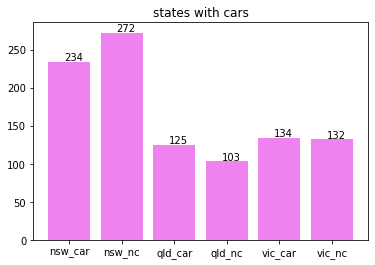

In [21]:
val=[nsw_car,nsw_nc,qld_car,qld_nc,vic_car,vic_nc]

x=np.arange(6)
plt.bar(x,val,color='violet')
plt.title('states with cars')

for i in range(6):
    plt.text(x=i-0.1,y=val[i]+2,s=val[i])
    
plt.xticks(x,['nsw_car','nsw_nc','qld_car','qld_nc','vic_car','vic_nc'])


In [22]:
new_cus.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [23]:
new_cus['wealth_segment'].value_counts()

Mass Customer        508
High Net Worth       251
Affluent Customer    241
Name: wealth_segment, dtype: int64

([<matplotlib.axis.XTick at 0x2ba96119188>,
 <a list of 3 Text xticklabel objects>)

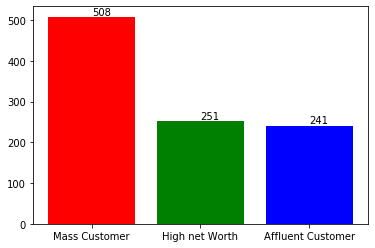

In [24]:
val=[508,251,241]
col=['r','g','b']

x=np.arange(3)
plt.bar(x,val,color=col)

for i in range(3):
    plt.text(x=i,y=val[i]+5,s=val[i])
    
plt.xticks(x,['Mass Customer','High net Worth','Affluent Customer'])


In [25]:
new_cus['job_industry_category'].value_counts()

Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

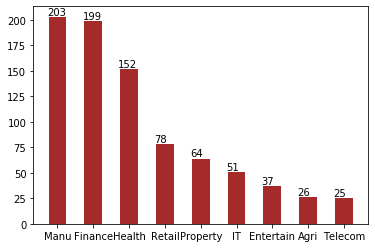

In [26]:
val=[203,199,152,78,64,51,37,26,25]
x3=np.arange(9)
plt.bar(x3,val,width=0.5,color='brown')
for i in range(len(val)):
    plt.text(x=i-0.30,y=val[i]+2,s = val[i], size = 10)

    plt.xticks(x3,("Manu", "Finance", "Health", "Retail", "Property", "IT", "Entertain", "Agri", "Telecom"))


In [27]:
cus_demo['gender'].value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [28]:
new_cus['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

([<matplotlib.axis.XTick at 0x2ba961ad5c8>,
 <a list of 6 Text xticklabel objects>)

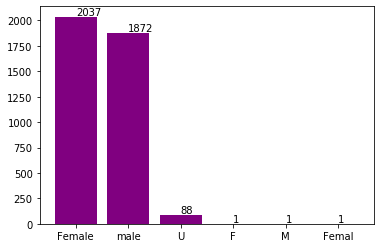

In [29]:
val=[2037,1872,88,1,1,1]
x=np.arange(6)
plt.bar(x,val,color='purple')

for i in range(len(val)):
    plt.text(x=i,y=val[i]+20,s=val[i])
    
plt.xticks(x,['Female','male','U','F','M','Femal'])


([<matplotlib.axis.XTick at 0x2ba961fa188>,
 <a list of 3 Text xticklabel objects>)

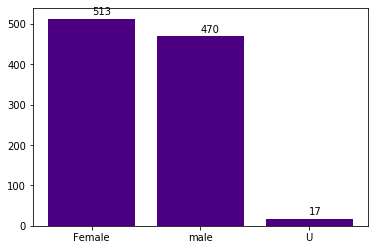

In [30]:
val=[513,470,17]
x=np.arange(3)
plt.bar(x,val,color='indigo')

for i in range(len(val)):
    plt.text(x=i,y=val[i]+10,s=val[i])
    
plt.xticks(x,['Female','male','U'])
